This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. \
There are 25 variables: 

- **ID**: ID of each client
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- **SEX**: Gender (1=male, 2=female)
- **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
- **AGE**: Age in years
- **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- **PAY_2**: Repayment status in August, 2005 (scale same as above)
- **PAY_3**: Repayment status in July, 2005 (scale same as above)
- **PAY_4**: Repayment status in June, 2005 (scale same as above)
- **PAY_5**: Repayment status in May, 2005 (scale same as above)
- **PAY_6**: Repayment status in April, 2005 (scale same as above)
- **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
- **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
- **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
- **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
- **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
- **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
- **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
- **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
- **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
- **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
- **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
- **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
- **default.payment.next.month**: Default payment (1=yes, 0=no)

$$\red{\text{there are values that have 0 (missing values) and categories named "unknown"; we need to clean!}}$$

In [12]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)

DATA_DIR = Path("data/UCI_Credit_Card.csv")

df = pd.read_csv(DATA_DIR, index_col="ID")
df.rename(
    columns={"PAY_0": "PAY_1", "default.payment.next.month": "DEFAULT_NEXT_MONTH"},
    inplace=True,
)
features = df.columns
training_features = features[:-1]
protected_features = ["SEX", "AGE", "EDUCATION", "MARRIAGE"]
non_protected_features = [f for f in training_features if f not in protected_features]
target_feature = features[-1]

bills = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
payments = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
late = ["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

df.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT_MONTH
ID,,,,,,,,,,,,,,,,,,,,,,,,
21232,150000.0,1,1,1,44,-1,-1,-1,-1,-1,0,4825.0,3003.0,6164.0,3370.0,7279.0,4445.0,3018.0,6201.0,3386.0,7299.0,1166.0,5.0,0
12453,140000.0,1,1,2,27,-1,-1,-1,-1,-1,-1,776.0,0.0,776.0,380.0,1157.0,768.0,0.0,1552.0,380.0,1157.0,783.0,388.0,0
680,30000.0,2,1,2,56,-1,0,0,-2,-2,-2,29033.0,17013.0,7024.0,7024.0,7024.0,7024.0,1283.0,7024.0,7024.0,7024.0,7024.0,7024.0,0
12702,200000.0,2,1,2,25,0,0,0,0,0,0,190123.0,194059.0,194464.0,76223.0,77822.0,80598.0,8487.0,5105.0,3000.0,2828.0,4073.0,1794.0,0
15778,10000.0,2,2,2,25,1,2,2,2,0,0,8599.0,9695.0,10385.0,9987.0,9987.0,0.0,1400.0,1000.0,0.0,0.0,0.0,0.0,1
12139,50000.0,2,1,2,25,0,0,0,0,0,0,42056.0,46024.0,45452.0,45450.0,41154.0,39034.0,5000.0,2000.0,1500.0,2000.0,4000.0,1364.0,1
20699,80000.0,1,3,2,44,0,0,0,0,-1,-1,55297.0,56677.0,57687.0,4500.0,4500.0,0.0,2300.0,2200.0,1005.0,4500.0,0.0,0.0,1
25431,160000.0,2,1,2,27,0,0,0,2,2,0,97375.0,112373.0,119017.0,104417.0,62975.0,53299.0,20000.0,10000.0,3017.0,0.0,3000.0,2000.0,0
16723,220000.0,1,1,1,47,2,2,2,0,0,0,165665.0,163494.0,162360.0,134989.0,124915.0,84959.0,2008.0,6000.0,6000.0,4000.0,2852.0,9000.0,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           30000 non-null  float64
 1   SEX                 30000 non-null  int64  
 2   EDUCATION           30000 non-null  int64  
 3   MARRIAGE            30000 non-null  int64  
 4   AGE                 30000 non-null  int64  
 5   PAY_1               30000 non-null  int64  
 6   PAY_2               30000 non-null  int64  
 7   PAY_3               30000 non-null  int64  
 8   PAY_4               30000 non-null  int64  
 9   PAY_5               30000 non-null  int64  
 10  PAY_6               30000 non-null  int64  
 11  BILL_AMT1           30000 non-null  float64
 12  BILL_AMT2           30000 non-null  float64
 13  BILL_AMT3           30000 non-null  float64
 14  BILL_AMT4           30000 non-null  float64
 15  BILL_AMT5           30000 non-null  float64
 16  BILL_AMT6

In [47]:
# For determining categorical /  numerical features
for f in features:
    print(f"{f} has {df[f].nunique()} unique values: {df[f].unique()}\n")

LIMIT_BAL has 81 unique values: [  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]

SEX has 2 unique values: [2 1]

EDUCATION has 7 unique values: [2 1 3 5 4 6 0]

MARRIAGE has 4 unique values: [1 2 3 0]

AGE has 56 unique values: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42

- PAY = categorical
- BILL_AMT = numerical
- PAY_AMT = numerical

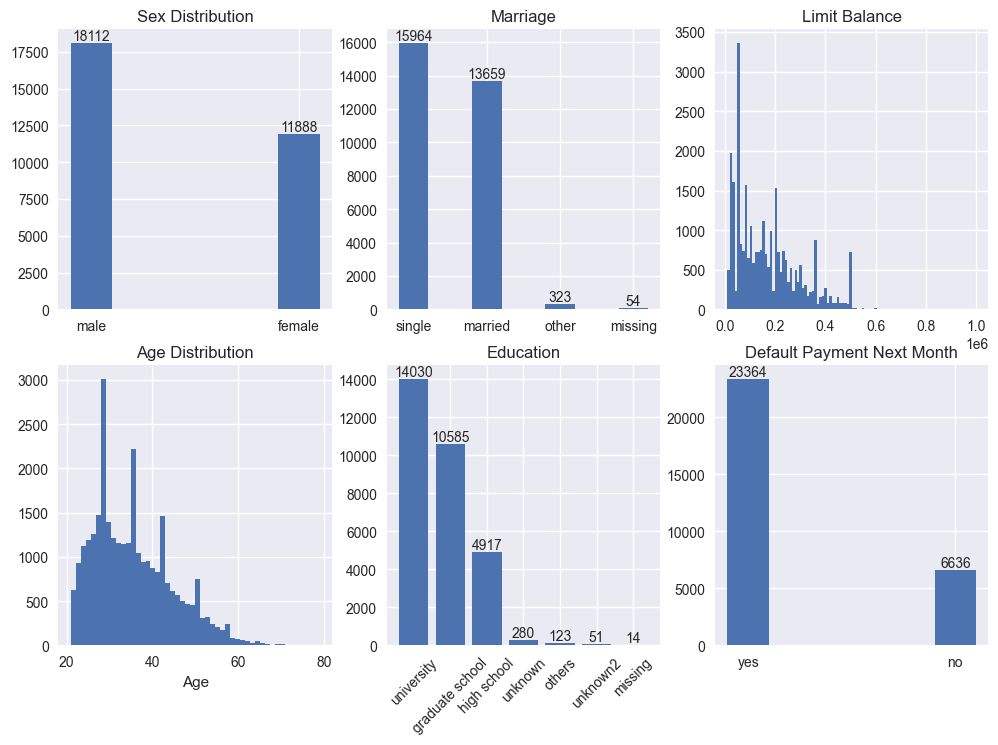

In [65]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs[0][0].bar(x=["male", "female"], height=df["SEX"].value_counts(), width=0.2)
axs[0][0].bar_label(axs[0][0].containers[0])
axs[0][0].set_title("Sex Distribution")

axs[0][1].bar(
    x=["single", "married", "other", "missing"],
    height=df["MARRIAGE"].value_counts(),
    width=0.4,
)
axs[0][1].bar_label(axs[0][1].containers[0])
axs[0][1].set_title("Marriage")

axs[1][0].hist(df["AGE"], bins=50)
axs[1][0].set_xlabel("Age")
axs[1][0].set_title("Age Distribution")

l = [
    "university",
    "graduate school",
    "high school",
    "unknown",
    "others",
    "unknown2",
    "missing",
]
axs[1][1].bar(x=np.arange(len(l)), height=df["EDUCATION"].value_counts())
axs[1][1].set_xticks(ticks=np.arange(len(l)), labels=l, rotation=45)
axs[1][1].bar_label(axs[1][1].containers[0])
axs[1][1].set_title("Education")

axs[0][2].hist(df["LIMIT_BAL"], bins=100)
axs[0][2].set_title("Limit Balance")

axs[1][2].bar(
    x=["yes", "no"], height=df[target_feature].value_counts(), width=0.2
)
axs[1][2].bar_label(axs[1][2].containers[0])
axs[1][2].set_title("Default Payment Next Month")

plt.show()

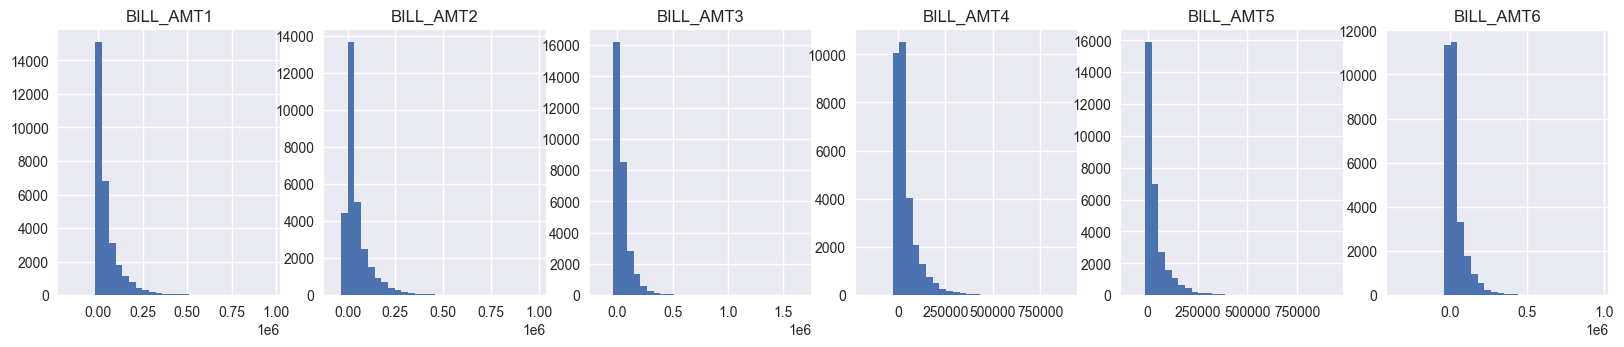

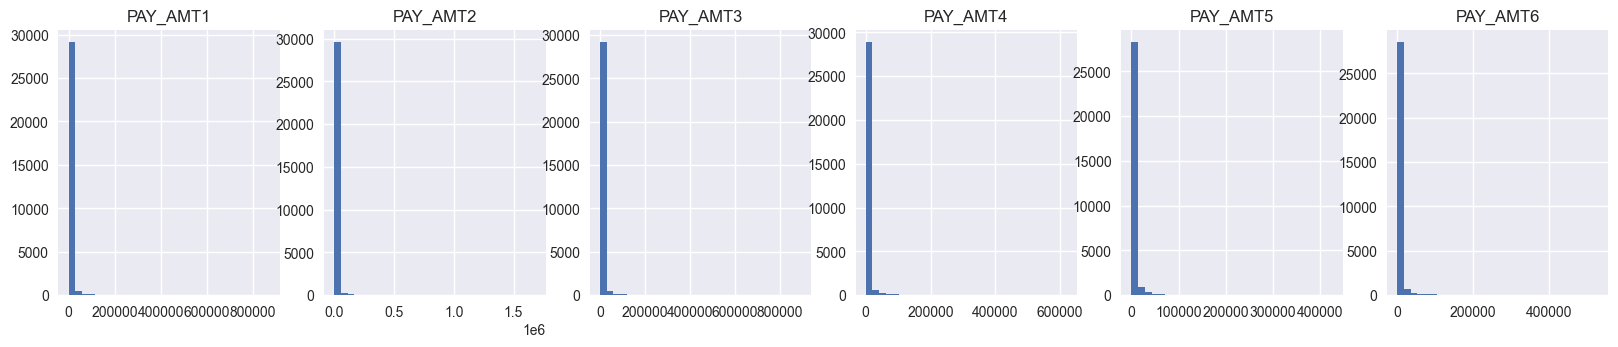

In [48]:
def draw_histograms(
    df: pd.DataFrame, variables: list[str], n_rows: int, n_cols: int, n_bins: int
):
    fig = plt.figure(figsize=(20, 20))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols, i + 1)
        df[var_name].hist(bins=n_bins, ax=ax)
        ax.set_title(var_name)
    #fig.tight_layout()
    plt.show()

draw_histograms(df, bills, 5, 6, 30)
draw_histograms(df, payments, 5, 6, 30)

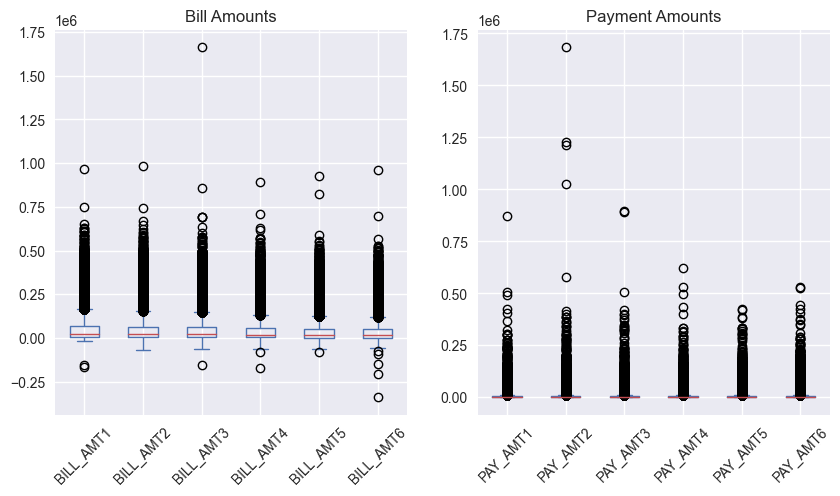

In [27]:
# Visible outliers
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, figsize=(10, 5), sharex=False, sharey=False
)
df[bills].plot(kind="box", figsize=(10, 5), ax=ax1)
ax1.set_title("Bill Amounts")
ax1.set_xticklabels(bills, rotation=45)

df[payments].plot(kind="box", figsize=(10, 5), ax=ax2)
ax2.set_title("Payment Amounts")
ax2.set_xticklabels(payments, rotation=45)

plt.show()

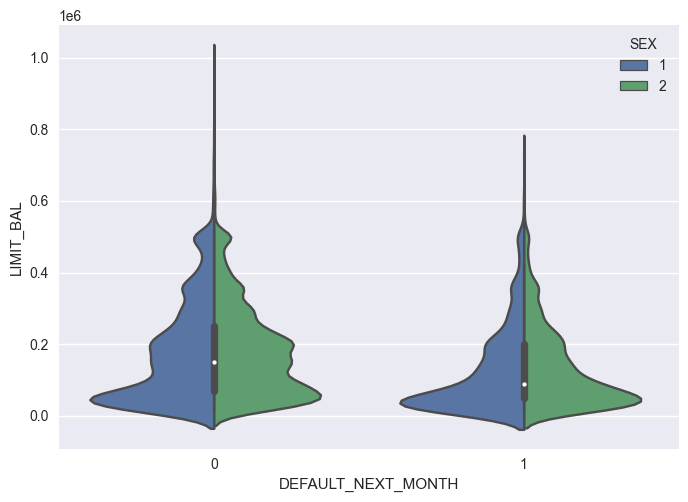

In [64]:
g = sns.violinplot(x="DEFAULT_NEXT_MONTH", y="LIMIT_BAL", data=df, hue="SEX", split=True, legend=True)

In [68]:
def feature_default_distribution_categorial(df, feature, x_labels = None, x_size = 8, y_size = 6):
    """Plot the distribution of default payment next month for a given categorial feature.
    """
    grouped = df.groupby([feature, target_feature]).size().unstack()

    # create plot
    _, ax = plt.subplots(figsize=(x_size, y_size))
    width = 0.35
    
    if not x_labels:
        x_labels = grouped.index
    
    x = pd.Series(range(len(x_labels)))

    ax.bar(
        x - width / 2,
        grouped[0],
        width,
        label="Doens't default next month",
    )
    ax.bar(
        x + width / 2,
        grouped[1],
        width,
        label="Defaults next month",
    )

    ax.set_xticks(x)
    ax.set_xticklabels(x_labels)
    ax.legend()
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

    plt.show()

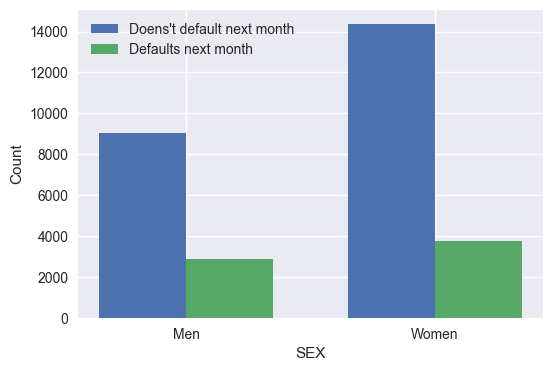

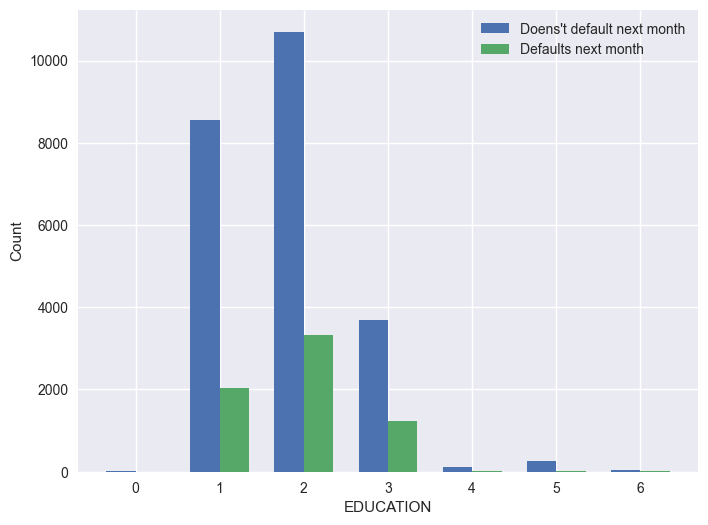

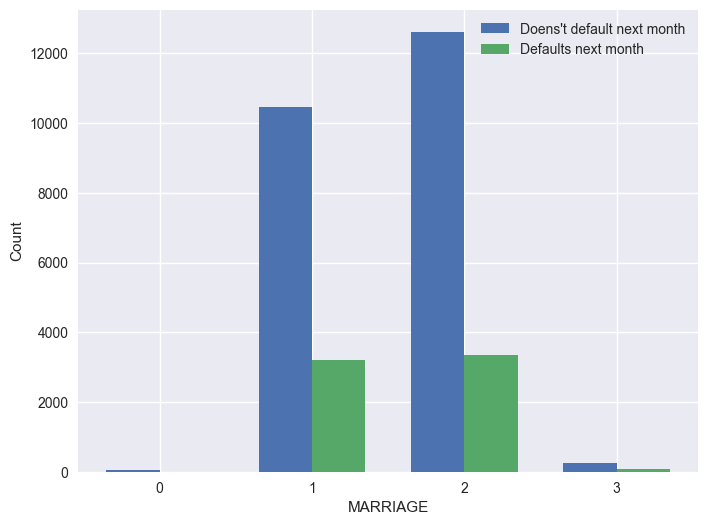

In [69]:
feature_default_distribution_categorial(df, "SEX", ['Men', 'Women'], x_size=6, y_size=4)
#['graduate school', 'university', 'high school', 'others', 'unknown', 'unknown']
feature_default_distribution_categorial(df, "EDUCATION")
feature_default_distribution_categorial(df, "MARRIAGE")

In [10]:
def feature_default_distribution_continuous(df: pd.DataFrame, feature: str, bins: int = 50):
    """Plot the distribution of default payment next month for a given numerical feature.
    """
    _, ax = plt.subplots()
    ax.hist(df[df["default.payment.next.month"] == 0][feature], bins=bins, alpha=0.5, label="No")
    ax.hist(df[df["default.payment.next.month"] == 1][feature], bins=bins, alpha=0.5, label="Yes")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.legend()
    ax.set_title(f"{feature} Distribution between Default and Non-Default")
    plt.show()

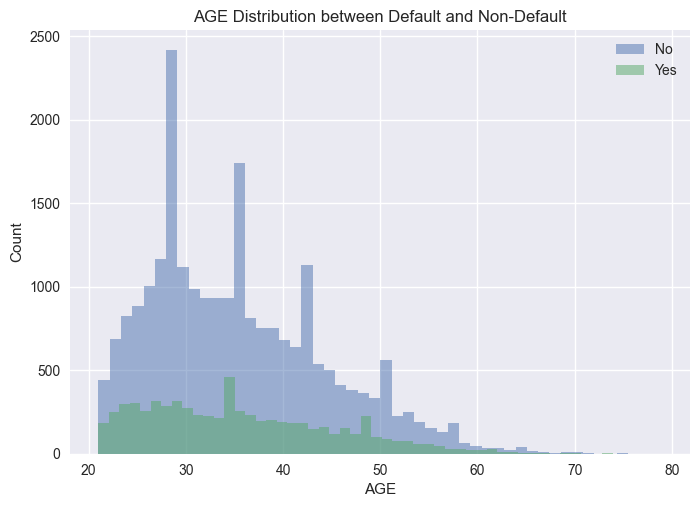

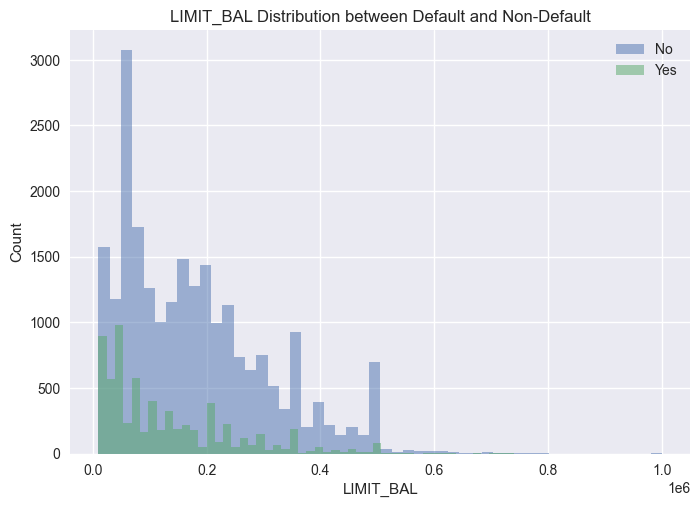

In [11]:
feature_default_distribution_continuous(df, "AGE")
feature_default_distribution_continuous(df, "LIMIT_BAL")

In [12]:
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res


display(corr_2_cols("SEX", "default.payment.next.month"))
display(corr_2_cols("EDUCATION", "default.payment.next.month"))
display(corr_2_cols("MARRIAGE", "default.payment.next.month"))

default.payment.next.month,0,1,perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


default.payment.next.month,0,1,perc
EDUCATION,,,
0,14.0,NaN,NaN
1,8549.0,2036.0,0.192348
2,10700.0,3330.0,0.237349
3,3680.0,1237.0,0.251576
4,116.0,7.0,0.056911
5,262.0,18.0,0.064286
6,43.0,8.0,0.156863


default.payment.next.month,0,1,perc
MARRIAGE,,,
0,49,5,0.092593
1,10453,3206,0.234717
2,12623,3341,0.209283
3,239,84,0.260062


<Axes: >

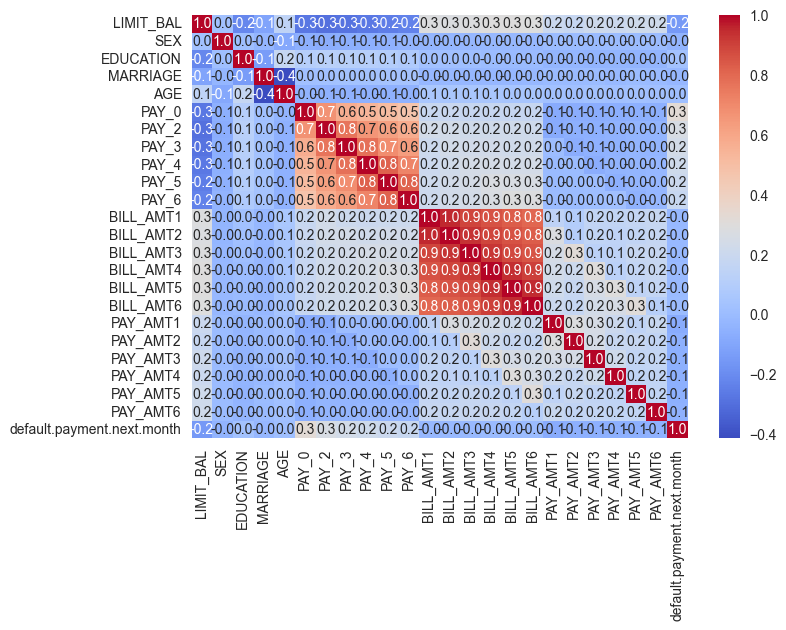

In [6]:
sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap="coolwarm")

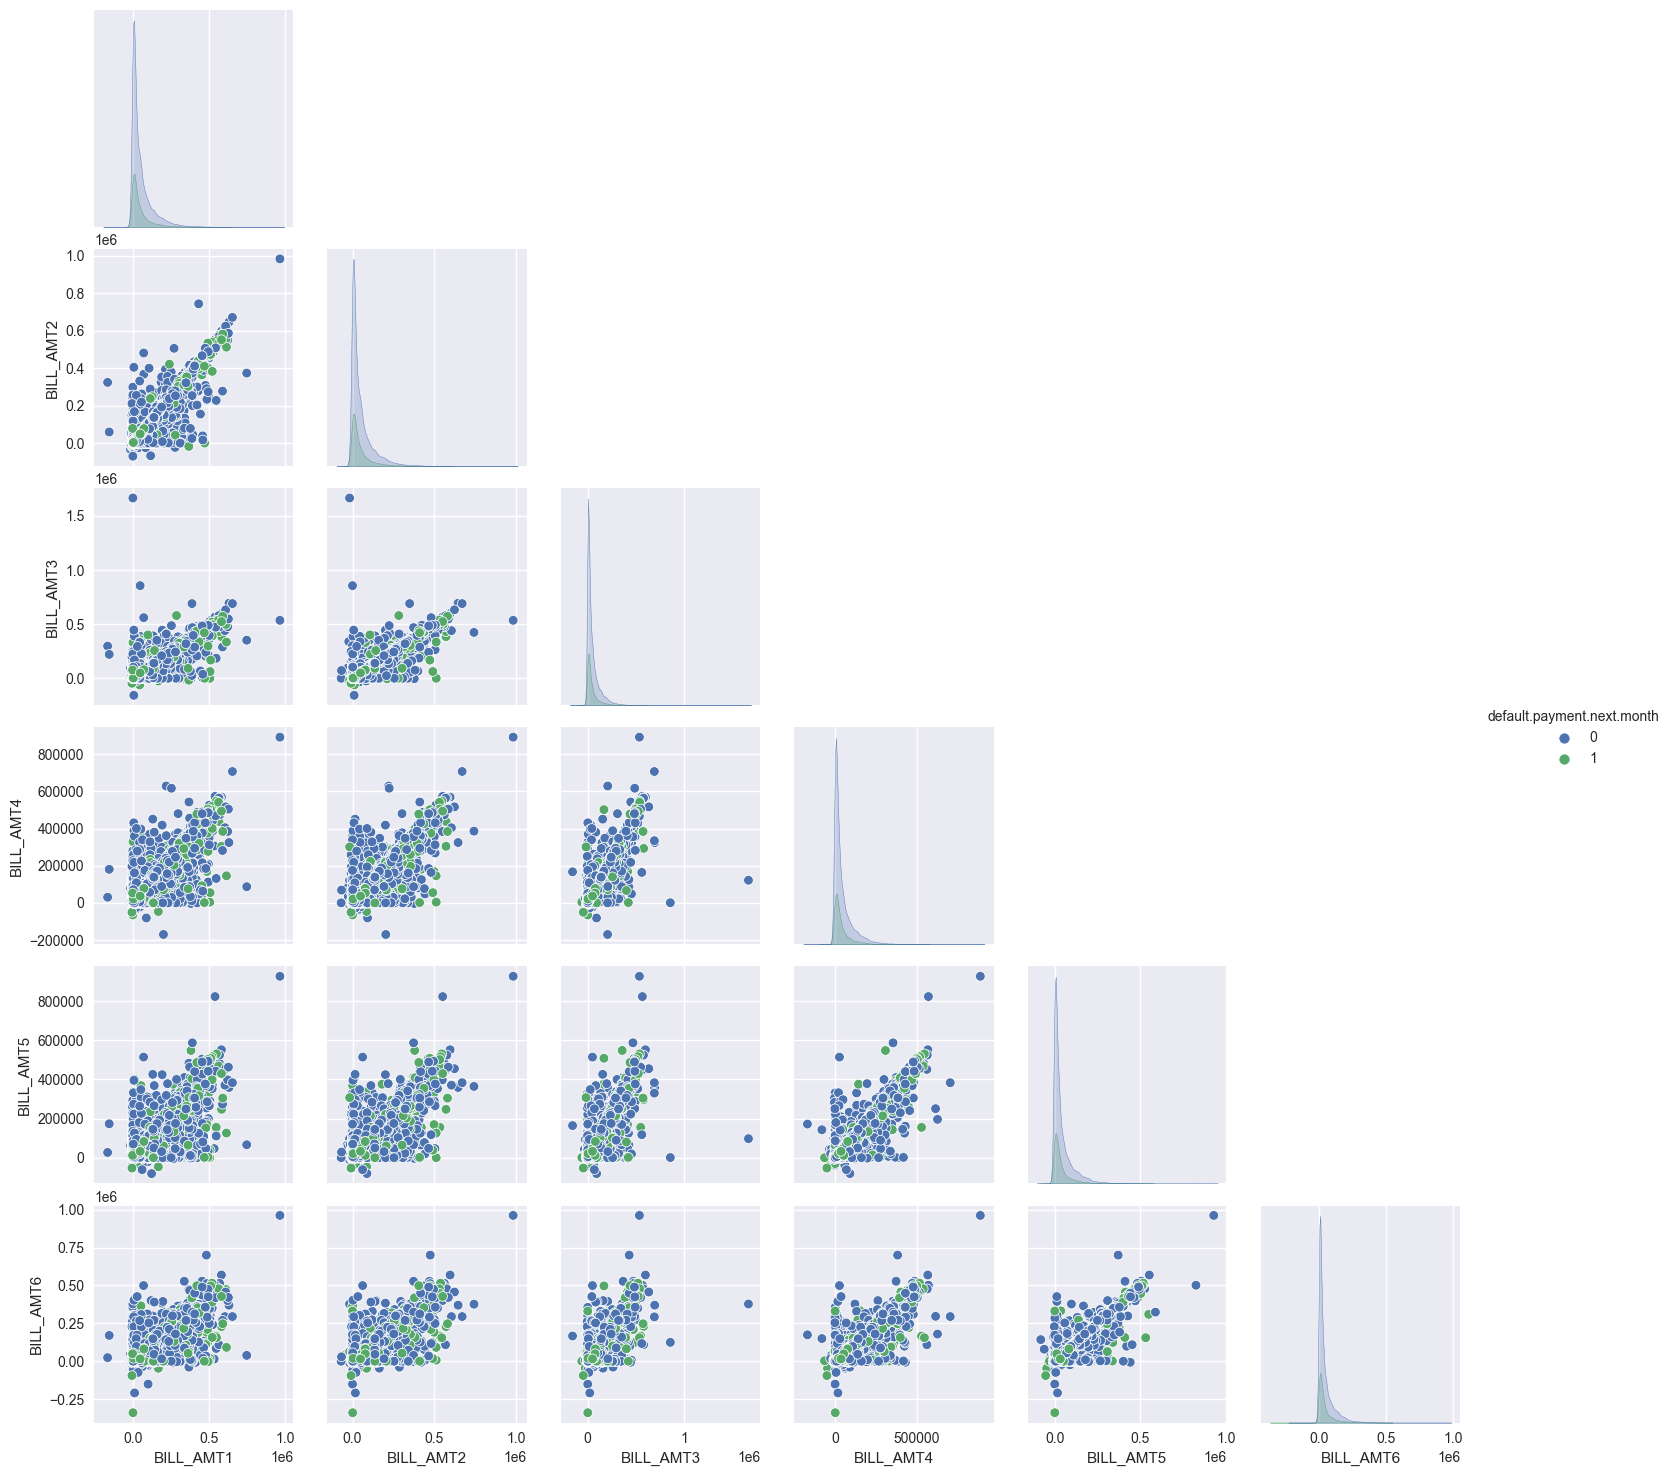

In [14]:
sns.pairplot(
    df[bills + ["default.payment.next.month"]],
    corner=True,
    diag_kind="kde",
    hue="default.payment.next.month",
)